# TEXT MINING ASSIGNMENT(ELON MUSK)

## Dataset: Elon_Musk.csv

In [33]:
!pip install spacy

In [34]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [35]:
# Loading dataset

tweets = pd.read_csv('C:/Users/Hi/Downloads/Elon_musk.csv', encoding = 'latin1', error_bad_lines=False)

## Data Preprocessing for Sentiment Analysis

In [36]:
tweets.shape

(1999, 2)

In [37]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [38]:
# Dropping additional index column 'Unnamed'

tweets = tweets.drop('Unnamed: 0', axis = 1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [39]:
# removing both the leading and the trailing characters such as spaces in tweets
tweets = [x.strip() for x in tweets.Text]

In [40]:
# removes empty strings, because they are considered in Python as False
tweets = [x for x in tweets if x]

In [41]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [42]:
import nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [45]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [79]:
afinn= pd.read_csv('C:/Users/Hi/Downloads/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [80]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [84]:
affinity_scores = afinn.set_index(['word'])['value'].to_dict()

In [82]:
!python -m spacy download en_core_web_sm

2022-01-19 16:10:22.972941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-19 16:10:22.972998: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [86]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [87]:
# test that it works
calculate_sentiment(text = 'good')

3

In [88]:
sent_df['sentiment_neg'] = sent_df['sentence'].apply(calculate_sentiment)

In [89]:
sent_df

,sentence,sentiment_neg
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [90]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [93]:
sent_df.sort_values(by='sentiment_neg')

,sentence,sentiment_neg,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [95]:
# Maximum sentiment value
sent_df['sentiment_neg'].max()

16

In [96]:
# tweet which is having max sentiment value
sent_df[sent_df['sentiment_neg']==16]

,sentence,sentiment_neg,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [97]:
# Full tweet at index 105
sent_df['sentence'][105]

'@Erdayastronaut @SpaceX Was also thinking that SpaceX Boca should hold fun parties and give tours for the community from time to time @Erdayastronaut @SpaceX I super support public spaces around our production &amp; launch sites, wherever it can be done\x85 https://t.co/wmqWcT2WFH @Christo49699922 @sean18743005 @Erdayastronaut @SpaceX That too @sean18743005 @Erdayastronaut @SpaceX Catapult high into the air &amp; land on the roof with a base jumping parachute (the only way to travel) @Erdayastronaut @SpaceX That\x92s actually our restaurant, but SpaceX is building a futuristic bar at the top of the h\x85 https://t.co/z2UmtGSAoI @techreview And increase fun!'

In [99]:
# minimum sentiment value
sent_df['sentiment_neg'].min()

-8

In [101]:
# tweet which is having min sentiment value
sent_df[sent_df['sentiment_neg']==-8]

,sentence,sentiment_neg,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60


In [102]:
# Full tweet at index 647
sent_df['sentence'][647]


'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.'

In [104]:
# Sentiment score of the whole review
sent_df['sentiment_neg'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_neg, dtype: float64

In [106]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_neg']<=0]

,sentence,sentiment_neg,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [107]:
sent_df[sent_df['sentiment_neg']>=10]

,sentence,sentiment_neg,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",10,45
159,@harsimranbansal @heydave7 It will most likely...,11,93
183,Theres some great AI out ther https://t.co/v...,10,48
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
224,"@PPathole @karpathy For a second there, I thou...",11,69
530,@TeslaClubIN @WholeMarsBlog @MKBHD Next year f...,10,121
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138


In [108]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Hi\anaconda3ab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_neg', ylabel='Density'>

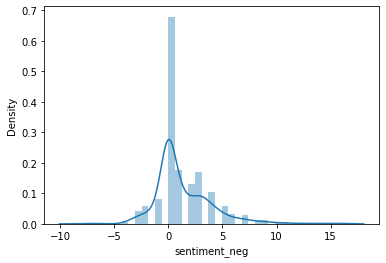

In [110]:
import seaborn as sns
sns.distplot(sent_df['sentiment_neg'])

<AxesSubplot:xlabel='index', ylabel='sentiment_neg'>

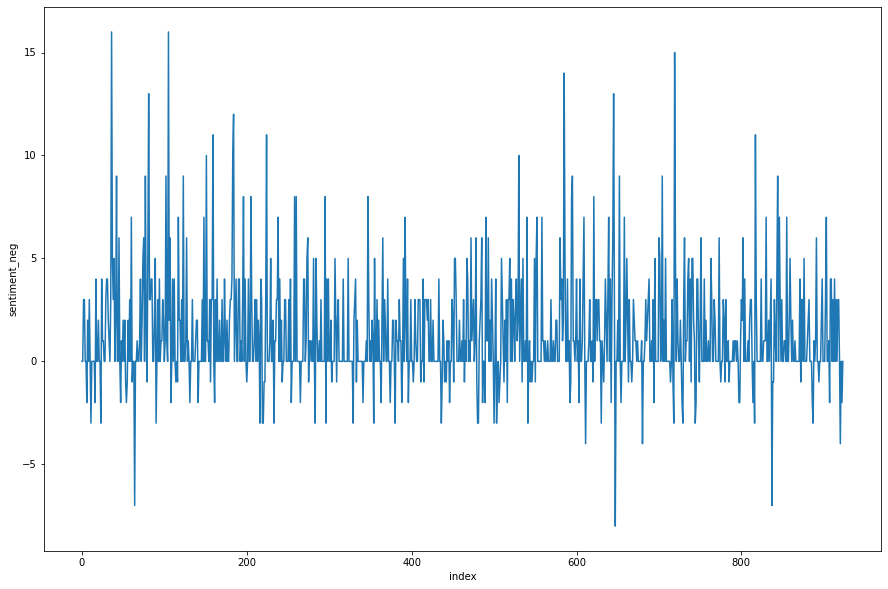

In [112]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_neg',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_neg'>

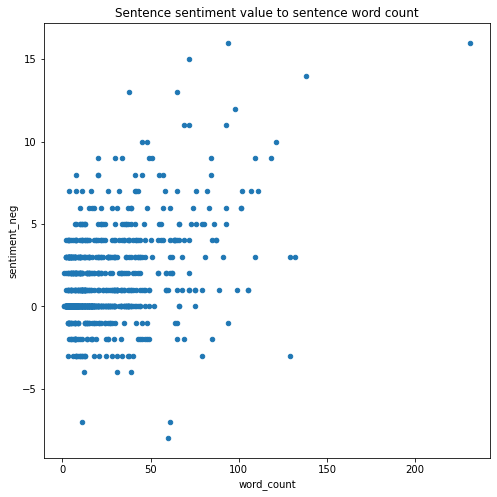

In [114]:
sent_df.plot.scatter(x='word_count', y='sentiment_neg', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [115]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_neg'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)

In [116]:
sent_df.sample(10)

,sentence,sentiment_neg,word_count,index,Sentiment_Class
367,"Tesla Motors, Inc., was almost called Faraday,...",3,47,367,Positive
266,Same with my bro.,0,4,266,Neutral
385,https://t.co/ruEdIPhTil @Nigel_Lockyer I could...,3,12,385,Positive
173,One word: Doge Bitcoin is almost as bs as fiat...,4,44,173,Positive
341,"Two tests came back negative, two cam https:/...",-2,29,341,Negative
50,@AOC @RobinhoodApp Absolutely @NASASpaceflight...,2,32,50,Positive
292,@Maisie_Williams <U+0001F3B6> Toss a bitcoin t...,0,18,292,Neutral
577,@Neopork85 @SpaceX @MarcusHouseGame We really ...,0,10,577,Neutral
587,Thrusters to be upgraded for future missions.,0,7,587,Neutral
304,"Last week, I had sym https://t.co/gL0mhrqJxY ...",0,41,304,Neutral


<AxesSubplot:xlabel='Sentiment_Class', ylabel='count'>

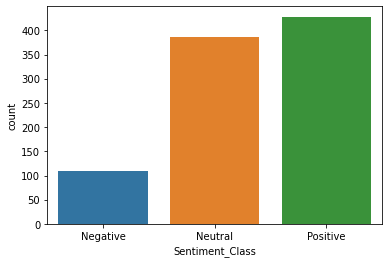

In [117]:
sns.countplot(x = 'Sentiment_Class', data = sent_df)

In [118]:
sent_df['Sentiment_Class'].value_counts()

Positive    428
Neutral     386
Negative    109
Name: Sentiment_Class, dtype: int64